# Loan Application Status Prediction (Evaluation Project - 6)

### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

#### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

#### To download the dataset, use the link given below :

https://github.com/SANJAY9068068086/Machine-Learning-DataSets/blob/34d3af4fcbbef7ff4b53074c0d8f61c9e37db1b9/loan_prediction.csv

In [1]:
# Import some necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Let's import the dataset

loan_data = pd.read_csv("loan_prediction.csv")
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Shape of the dataset

loan_data.shape

(614, 13)

In [4]:
# Let's drop the column which is not useful

loan_data.drop(columns = ["Loan_ID"], axis=1, inplace=True)

In [5]:
# Quick information about dataset

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [6]:
# Let's check the value counts

for column in loan_data:
    print(column, loan_data[column].value_counts())

Gender Male      489
Female    112
Name: Gender, dtype: int64
Married Yes    398
No     213
Name: Married, dtype: int64
Dependents 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed No     500
Yes     82
Name: Self_Employed, dtype: int64
ApplicantIncome 2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64
CoapplicantIncome 0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
LoanAmount 120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
Loan_Amount_Term 360.0    512
180.0     44
480.0     15
300.0  

All the columns looks good but dependent column has value 3+ means not numerical. Let's check it

In [7]:
# Unique count of Dependent Feature

loan_data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [8]:
# Converting Dependets feature object to numerical by replacing 3+ to  3 and change the dtype of it

loan_data["Dependents"] = loan_data["Dependents"].replace("3+",3)
loan_data["Dependents"] = loan_data["Dependents"].astype(float)

In [9]:
# Let's check agian the Dependents Feature

loan_data["Dependents"].unique()

array([ 0.,  1.,  2.,  3., nan])

<AxesSubplot:xlabel='Gender', ylabel='count'>

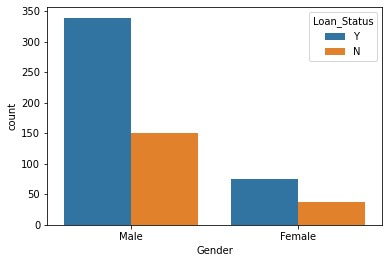

In [10]:
# Loan Status vs Gender

sns.countplot(x="Gender", data=loan_data, hue="Loan_Status")

# Mostly Male take Loans

<AxesSubplot:xlabel='Married', ylabel='count'>

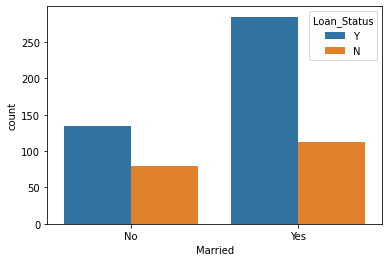

In [11]:
# Loan Status vs Marital Status

sns.countplot(x="Married", data=loan_data, hue="Loan_Status")

# Mostly Married people take loans

<AxesSubplot:xlabel='Education', ylabel='count'>

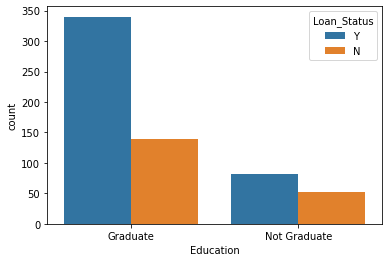

In [12]:
# Loan Status vs Education

sns.countplot(x="Education", data=loan_data, hue="Loan_Status")

# Mostly Graduate people take loans

<AxesSubplot:xlabel='Dependents', ylabel='count'>

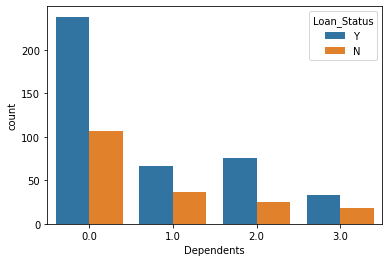

In [13]:
# Loan Status vs Dependents

sns.countplot(x="Dependents", data=loan_data, hue="Loan_Status")

# Mostly people who have not any dependent on him take loans

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

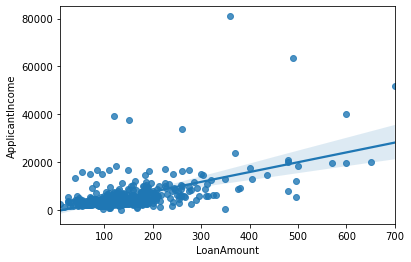

In [14]:
# Loan Amount vs Applicant Income

sns.regplot(x="LoanAmount", y="ApplicantIncome", data=loan_data)

# It shows that Loan Amount is depend on his Income

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

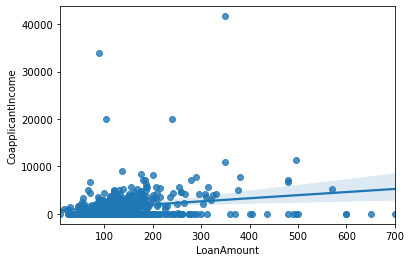

In [15]:
# Loan Amount vs CoapplicantIncome

sns.regplot(x="LoanAmount", y="CoapplicantIncome", data=loan_data)

# It shows that Loan Amount is depend on his/her Coappliant Income

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

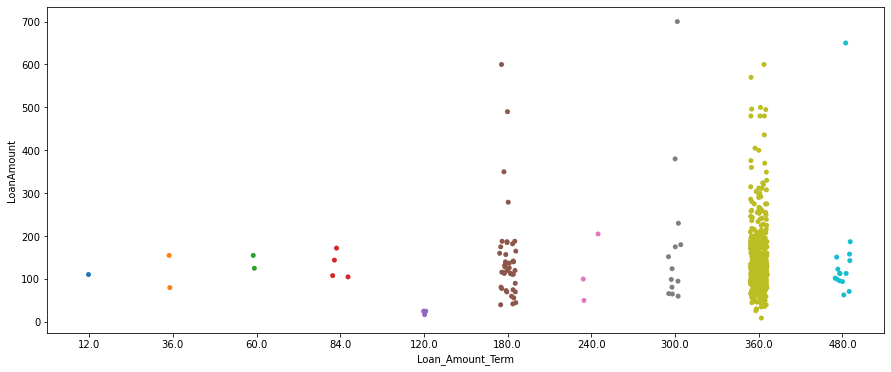

In [16]:
# Loan Amount vs Loan Amount Term

plt.figure(figsize=(15,6))
sns.stripplot(y="LoanAmount", x="Loan_Amount_Term", data=loan_data)

# Most people take 360 Loan Amount Term

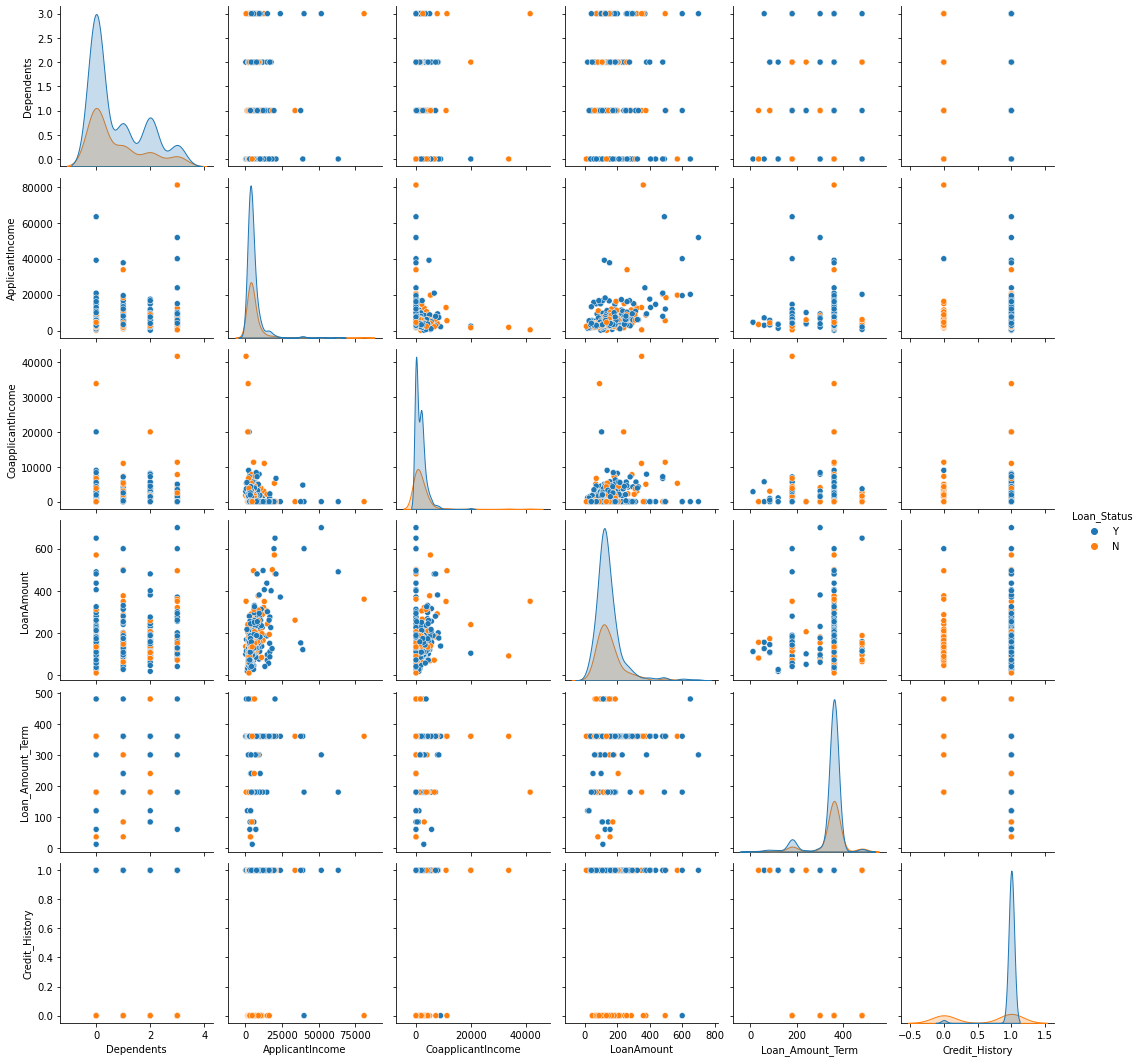

In [17]:
# Let's check the pairplot

sns.pairplot(loan_data, hue="Loan_Status")

In [18]:
# Let' check the null values

feature_data = loan_data.isnull().sum().keys().tolist()
values_data = loan_data.isnull().sum().values.tolist()
missing_data = pd.DataFrame(list(zip(feature_data, values_data)), columns = ["Features", "Missing Data"])
missing_data["Missing %"] = round(((missing_data["Missing Data"]/loan_data.shape[0])*100),2)

missing_data

,Features,Missing Data,Missing %
0,Gender,13,2.12
1,Married,3,0.49
2,Dependents,15,2.44
3,Education,0,0.00
4,Self_Employed,32,5.21
5,ApplicantIncome,0,0.00
6,CoapplicantIncome,0,0.00
7,LoanAmount,22,3.58
8,Loan_Amount_Term,14,2.28
9,Credit_History,50,8.14


7 columns have null values.

In [19]:
# Let's check the correlation matrix

corr = loan_data.corr()
corr

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.118679,0.027259,0.163997,-0.100484,-0.050082
ApplicantIncome,0.118679,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,0.027259,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.163997,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.100484,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.050082,-0.014715,-0.002056,-0.008433,0.001470,1.000000


Text(0.5, 1.0, 'Correlation between Features')

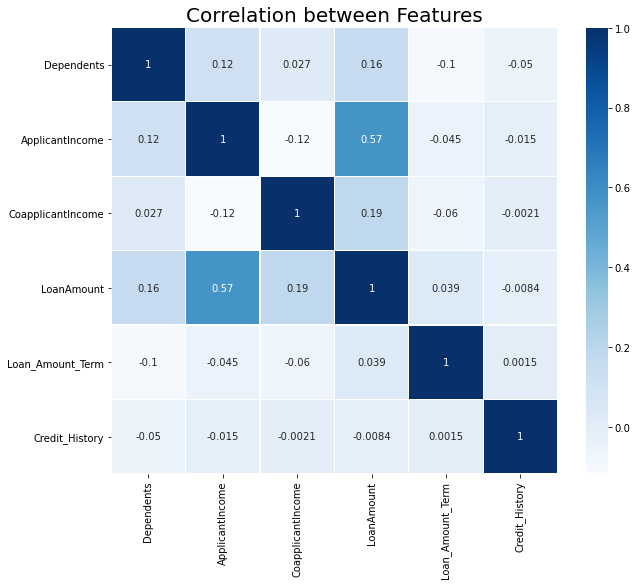

In [20]:
# Let's plot a heatmap for more clearity

plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, cbar=True, annot=True, cbar_kws={"shrink":.82}, annot_kws={"size":10},
            linewidth=.2, cmap="Blues",fmt=".2g")
plt.title("Correlation between Features", fontsize=20)

Not a single column is correlated to each other. Data looks good.

In [21]:
# Let's deal with Null values

categorical = loan_data.select_dtypes(include=["object"]).columns.tolist()
numerical = loan_data.select_dtypes(include=["int64", "float64"]).columns.tolist()

for column in loan_data:
    if loan_data[column].isnull().any():
        if column in categorical:
            loan_data[column] = loan_data[column].fillna(loan_data[column].mode()[0])
        else:
            loan_data[column] = loan_data[column].fillna(loan_data[column].mean())

In [22]:
# Let' again check the null value if any present...

feature_data = loan_data.isnull().sum().keys().tolist()
values_data = loan_data.isnull().sum().values.tolist()
missing_data = pd.DataFrame(list(zip(feature_data, values_data)), columns = ["Features", "Missing Data"])
missing_data["Missing %"] = round(((missing_data["Missing Data"]/loan_data.shape[0])*100),2)

missing_data

,Features,Missing Data,Missing %
0,Gender,0,0.0
1,Married,0,0.0
2,Dependents,0,0.0
3,Education,0,0.0
4,Self_Employed,0,0.0
5,ApplicantIncome,0,0.0
6,CoapplicantIncome,0,0.0
7,LoanAmount,0,0.0
8,Loan_Amount_Term,0,0.0
9,Credit_History,0,0.0


All null values fixed

In [23]:
# Let's check the skewness

loan_data.skew()

Dependents           0.990764
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

Skewness is very high, Let's remove it..

In [24]:
# Let's use zscore technique to remove the skewness

from scipy.stats import zscore

z = np.abs(zscore(loan_data[numerical]))
loan_data = loan_data[(z<3).all(axis=1)]

In [25]:
# Let's again check the skewness

loan_data.skew()

Dependents           1.024159
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
dtype: float64

Skewness is still pending. So, let's try another technique to remove it

In [26]:
# Skewness Remove technique

for index in loan_data.skew().index:
    if loan_data.skew().loc[index]>0.5:
        loan_data[index] = np.log1p(loan_data[index])
    if loan_data.skew().loc[index]<-0.5:
        loan_data[index] = np.square(loan_data[index])

In [27]:
# Let's again check the skewness

loan_data.skew()

Dependents           0.653810
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.187931
Loan_Amount_Term    -0.909280
Credit_History      -1.810561
dtype: float64

Y    398
N    179
Name: Loan_Status, dtype: int64


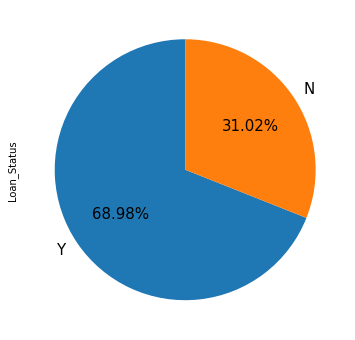

In [28]:
# Let's check the class imbalance of output column

print(loan_data["Loan_Status"].value_counts())
loan_data["Loan_Status"].value_counts().plot.pie(figsize=(6,6), startangle=90, autopct="%.2f%%", fontsize=15)

# Let's convert the target column to numerical

loan_data["Loan_Status"] = loan_data["Loan_Status"].replace({"Y":1, "N":0})

Here I can see that class imbalance issue exist. Let's adjust it

In [29]:
# Let's separate the input and output columns

x = loan_data.drop(columns = ["Loan_Status"], axis=1)
y = loan_data["Loan_Status"]

In [30]:
# Let first use one hot encoding technique to convert the categorical data to numerical

print("Shape before one hot encoding", x.shape)
x = pd.get_dummies(x, drop_first=True)
print("Shape after one hot encoding",x.shape)

Shape before one hot encoding (577, 11)
Shape after one hot encoding (577, 12)


Shape before over_sampling :  (577, 12)
Shape after over_sampling :  (796, 12) 


1    398
0    398
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

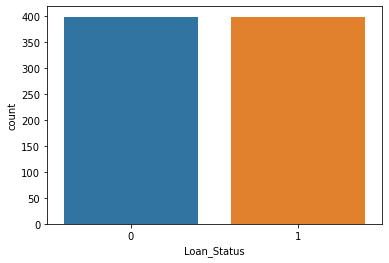

In [31]:
# Removing Class imbalance issue

print("Shape before over_sampling : ",x.shape)
from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)
print("Shape after over_sampling : ",x.shape,"\n\n")

# Let' check the class imbalance issue solved or not

print(y.value_counts())
sns.countplot(y)

Now the class imbalance issue solved. Let's go..

In [32]:
# Let's import some necessary libraries for model building

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from time import time

In [33]:
# Let's do scaling first

scaler = StandardScaler()
df_x = scaler.fit_transform(x)
df_x

array([[-0.83237539,  0.75235074, -1.10736954, ..., -0.3319357 ,
        -0.6648526 ,  1.5687159 ],
       [ 0.59676611,  0.29226828,  0.80140321, ..., -0.3319357 ,
        -0.6648526 , -0.63746406],
       [-0.83237539, -0.50694168, -1.10736954, ...,  3.01263163,
        -0.6648526 ,  1.5687159 ],
       ...,
       [-0.83237539, -0.41470762,  0.89579033, ..., -0.3319357 ,
        -0.6648526 , -0.63746406],
       [-0.48484913, -0.4738144 ,  0.89438625, ..., -0.3319357 ,
         1.50409278, -0.63746406],
       [ 0.25363399, -0.12731621,  0.98793854, ..., -0.3319357 ,
        -0.6648526 ,  1.5687159 ]])

In [34]:
# Let's find the best random state

def bestmodel(model):
    max_state = 0
    max_score = 0
    start = time()
    for i in range(1,201):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.25, random_state=i)
        model.fit(x_train, y_train)
        y_pre = model.predict(x_test)
        score = accuracy_score(y_test, y_pre)
        if score > max_score:
            max_score = score
            max_state = i
    print("Best Random State is      : ",max_state)
    print("Best Accuracy Score is    : ",max_score)
    print("Cross Validation Score is : ",cross_val_score(model, df_x, y, cv=5).mean())
    end = time()
    print("Time taken by model for prediction : {:.4f} seconds".format(end-start))

In [35]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
bestmodel(LR)

Best Random State is      :  113
Best Accuracy Score is    :  0.8442211055276382
Cross Validation Score is :  0.7713993710691824
Time taken by model for prediction : 1.9225 seconds


In [36]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
bestmodel(DTC)

Best Random State is      :  25
Best Accuracy Score is    :  0.8492462311557789
Cross Validation Score is :  0.7601100628930817
Time taken by model for prediction : 0.9944 seconds


In [37]:
# K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier()
bestmodel(KNC)

Best Random State is      :  12
Best Accuracy Score is    :  0.8241206030150754
Cross Validation Score is :  0.7500314465408805
Time taken by model for prediction : 3.9144 seconds


In [38]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
bestmodel(GBC)

Best Random State is      :  113
Best Accuracy Score is    :  0.8793969849246231
Cross Validation Score is :  0.792814465408805
Time taken by model for prediction : 38.5490 seconds


In [39]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
bestmodel(RFC)

Best Random State is      :  79
Best Accuracy Score is    :  0.8844221105527639
Cross Validation Score is :  0.8204481132075472
Time taken by model for prediction : 61.0549 seconds


In [40]:
# Support Vector Machine

from sklearn.svm import SVC

svc = SVC()
bestmodel(svc)

Best Random State is      :  123
Best Accuracy Score is    :  0.8341708542713567
Cross Validation Score is :  0.7688993710691824
Time taken by model for prediction : 8.8621 seconds


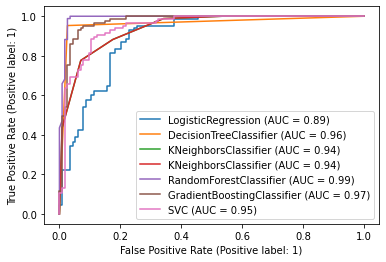

In [41]:
# Let's plot ROC AUC curve

x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.25, random_state=88)

disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(KNC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(KNC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GBC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)

plt.legend(prop={"size" : 10}, loc="lower right")
plt.show()

#### After analyzing the Accuracy Score, Cross Validation Score and ROC AUC Curve of above 7 model. Now it is clear that Random Forest Classifier is giving the best Accuracy Score. Let's try to increase the score  of RFC using HyperParameterTuning...

In [42]:
# HyperParameter Tuning with RFC

from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators" : [100,200], "criterion" : ["gini", "entropy"],
             "min_samples_split" : [2,3], "min_samples_leaf" : [1,2]}

grid_search = GridSearchCV(RFC, param_grid)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [50]:
# Final Model

Final_Model = RandomForestClassifier(n_estimators=200, criterion="gini", min_samples_split=2, min_samples_leaf=1)
x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.25, random_state=79)
Final_Model.fit(x_train, y_train)
y_preds = Final_Model.predict(x_test)
accuracy_score(y_test, y_preds)

0.8944723618090452

In [51]:
# Saving the Final Model

import joblib

joblib.dump(Final_Model,"Final_Model.pkl")

['Final_Model.pkl']